In [1]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np
# np.random.seed(42)
RANDOM_SEED = 42

In [15]:

# Import the data
df_raw = pd.read_csv("./sample_data/transactions-2020-05-11-2021-05-12.csv")
df_raw.head()
df_raw["Date"]+ " " + df_raw["Time"]
df_datetime = pd.to_datetime(df_raw["Date"]+ " " + df_raw["Time"])
df_datetime.head()

df_datetime_sales = pd.concat([df_datetime, df_raw["Gross Sales"].apply(lambda x: float(x[1:]))], axis=1)
df_datetime_sales.columns = ["datetime", "gross_sales"]
df_datetime_sales["orders"] = 1

df_datetime_sales['datetime'] = pd.to_datetime(df_datetime_sales['datetime'])
# df.head()

# Set the date as index 
df_datetime_sales = df_datetime_sales.set_index('datetime')
# Select the proper time period for weekly aggreagation
df_W = df_datetime_sales.resample('W').sum()
df_D = df_datetime_sales.resample('D').sum()
df_H = df_datetime_sales.resample('H').sum()
df_H.head()

/home/hadoop/anaconda3/envs/api/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (40) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,gross_sales,orders
datetime,,
2020-05-11 07:00:00,22.50,2
2020-05-11 08:00:00,50.05,7
2020-05-11 09:00:00,117.85,13
2020-05-11 10:00:00,197.80,17
2020-05-11 11:00:00,64.15,11


In [17]:
# feature engineering
# pd.Series(df_H.index).dt.day_name()
# pd.Series(df_H.index).dt.hour
# df_D = df.copy()
df_D["week_day"]= pd.Series(df_D.index).dt.day_name().values
df_D["month"]= pd.Series(df_D.index).dt.month.values

df_H["week_day"] = pd.Series(df_H.index).dt.day_name().values
df_H["hour"] = pd.Series(df_H.index).dt.hour.values
# notice the business hour
df_H.head()

,gross_sales,orders,week_day,hour
datetime,,,,
2020-05-11 07:00:00,22.50,2,Monday,7
2020-05-11 08:00:00,50.05,7,Monday,8
2020-05-11 09:00:00,117.85,13,Monday,9
2020-05-11 10:00:00,197.80,17,Monday,10
2020-05-11 11:00:00,64.15,11,Monday,11


<AxesSubplot:xlabel='week_day', ylabel='orders'>

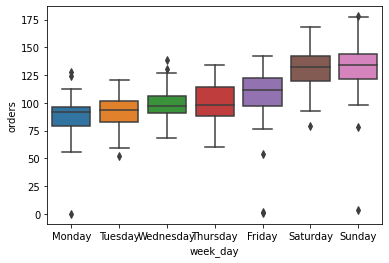

In [18]:
sns.boxplot(x=df_D.week_day, y=df_D.orders)


<AxesSubplot:xlabel='hour', ylabel='orders'>

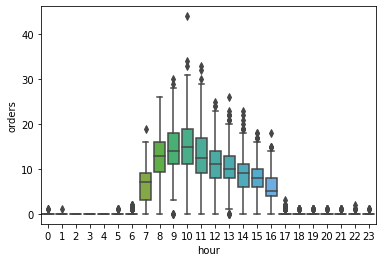

In [19]:
# it also show the business hour
sns.boxplot(x=df_H.hour, y=df_H.orders)


<ipython-input-20-c0e1a443d0ac>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_H.orders[df_H.hour>=17] = 0
<ipython-input-20-c0e1a443d0ac>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_H.orders[df_H.hour<=6] = 0


<AxesSubplot:xlabel='hour', ylabel='orders'>

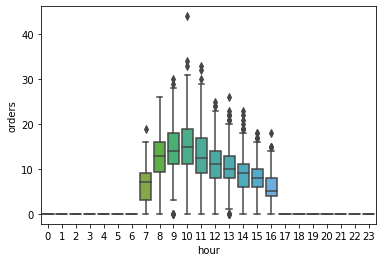

In [20]:
# out of business hour order = 0
df_H.orders[df_H.hour>=17] = 0
df_H.orders[df_H.hour<=6] = 0
sns.boxplot(x=df_H.hour, y=df_H.orders)

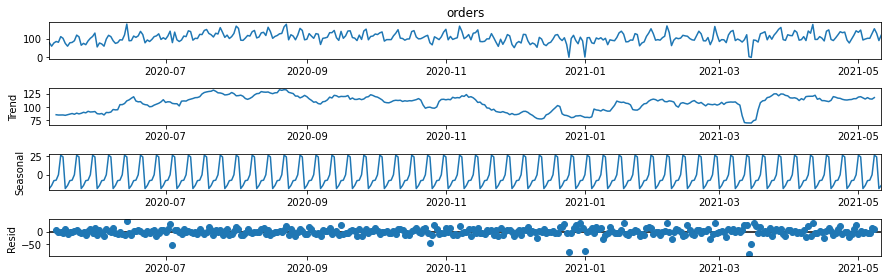

In [21]:
# decompose df_D
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_D = seasonal_decompose(df_D.orders)
fig =  decompose_D.plot()
fig.set_figwidth(14)
plt.show()

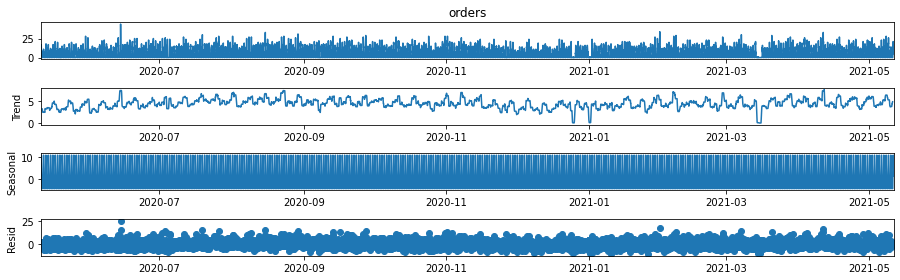

In [22]:
# decompose_H
decompose_H = seasonal_decompose(df_H.orders)
fig =  decompose_H.plot()
fig.set_figwidth(14)
plt.show()

In [23]:
# non-zerorization (to use multiplicative decomposition)
# df_D[df_D.orders==0]
df_D.orders = df_D.orders.apply(lambda x: np.nan if (x==0) else x)
df_D.orders = df_D.orders.fillna(df_D.orders.mean())
# df_H[df_H.orders==0]
df_H.orders = df_H.orders.apply(lambda x: np.nan if (x==0) else x)
df_H.orders = df_H.orders.fillna(df_H.orders.mean())


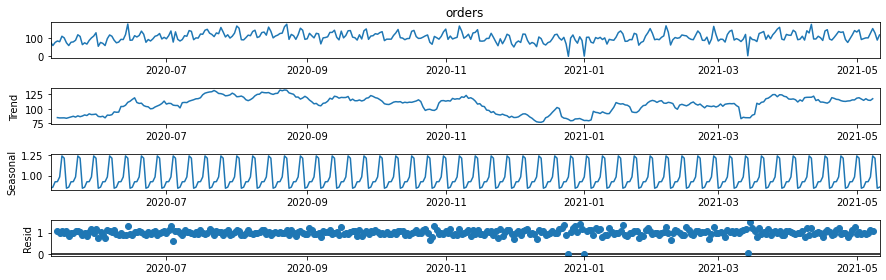

In [24]:
decompose_D = seasonal_decompose(df_D.orders, model="muliplicative")
fig =  decompose_D.plot()
fig.set_figwidth(14)
plt.show()

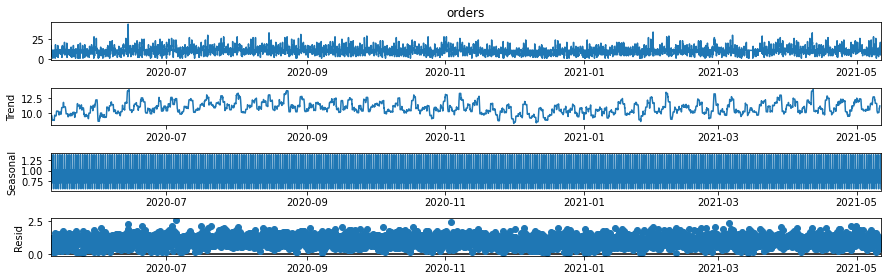

In [25]:
decompose_H = seasonal_decompose(df_H.orders, model="muliplicative")
fig =  decompose_H.plot()
fig.set_figwidth(14)
plt.show()

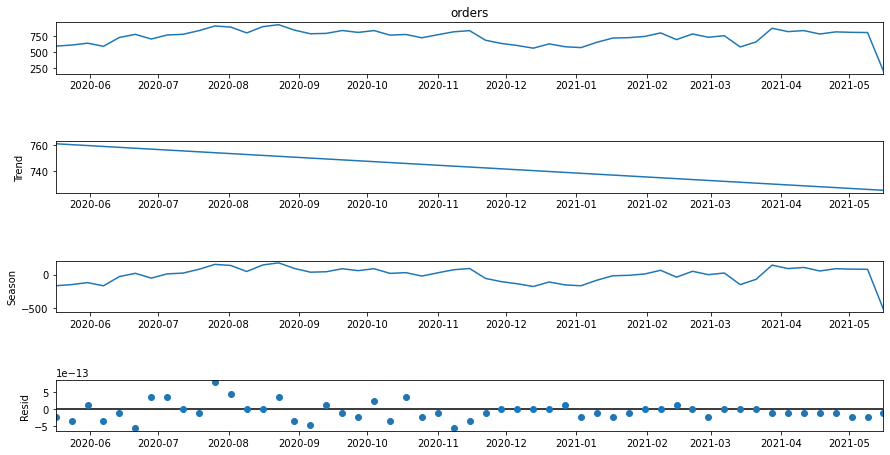

In [26]:
# using STL 
# ref: https://www.statsmodels.org/devel/generated/statsmodels.tsa.seasonal.STL.html
# ref: https://medium.com/quantjam/introduction-to-time-series-trend-decomposition-with-python-b54a29f8e038
from statsmodels.tsa.seasonal import STL
decompose_stl_W = STL(df_W.orders).fit()
# decompose_stl
fig = decompose_stl_W.plot()
fig.set_size_inches(14,7)
plt.show()

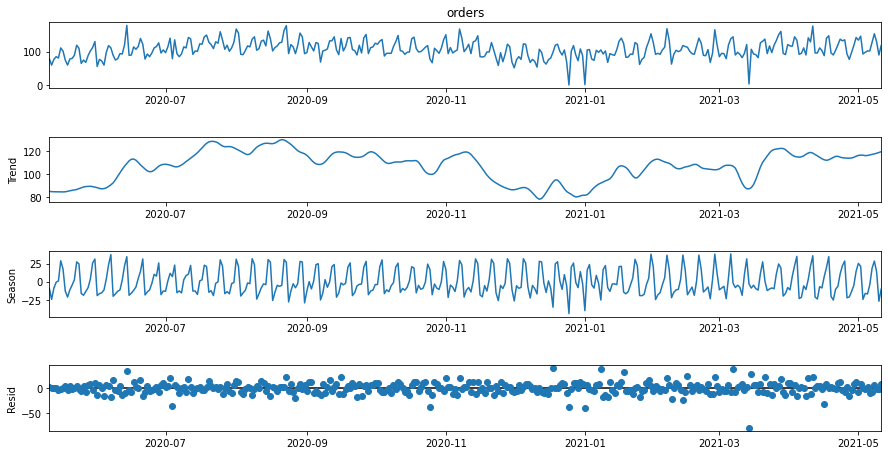

In [27]:
# using STL 
# ref: https://www.statsmodels.org/devel/generated/statsmodels.tsa.seasonal.STL.html
# ref: https://medium.com/quantjam/introduction-to-time-series-trend-decomposition-with-python-b54a29f8e038
from statsmodels.tsa.seasonal import STL
decompose_stl_D = STL(df_D.orders).fit()
# decompose_stl
fig = decompose_stl_D.plot()
fig.set_size_inches(14,7)
plt.show()

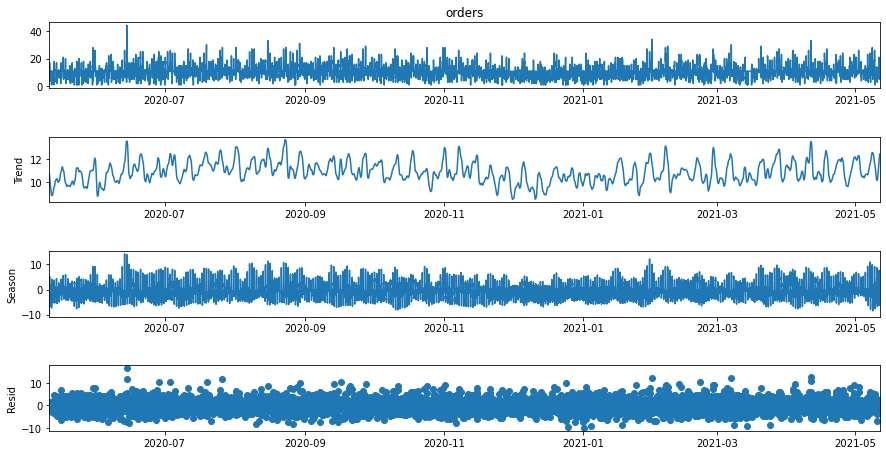

In [28]:
# using STL 
# ref: https://www.statsmodels.org/devel/generated/statsmodels.tsa.seasonal.STL.html
# ref: https://medium.com/quantjam/introduction-to-time-series-trend-decomposition-with-python-b54a29f8e038
from statsmodels.tsa.seasonal import STL
decompose_stl_H = STL(df_H.orders).fit()
# decompose_stl
fig = decompose_stl_H.plot()
fig.set_size_inches(14,7)
plt.show()

In [29]:
# decompose analysis
df_decomp_stl_W = pd.concat([decompose_stl_W.observed, decompose_stl_W.trend, decompose_stl_W.seasonal, 
                             decompose_stl_W.resid], axis=1)
df_decomp_stl_W["month"]= pd.Series(df_decomp_stl_W.index).dt.month.values
df_decomp_stl_W.head()

,orders,trend,season,resid,month
datetime,,,,,
2020-05-17,595,761.298023,-166.298023,-2.273737e-13,5
2020-05-24,611,760.609416,-149.609416,-3.410605e-13,5
2020-05-31,640,759.920809,-119.920809,1.136868e-13,5
2020-06-07,592,759.232201,-167.232201,-3.410605e-13,6
2020-06-14,728,758.543594,-30.543594,-1.136868e-13,6


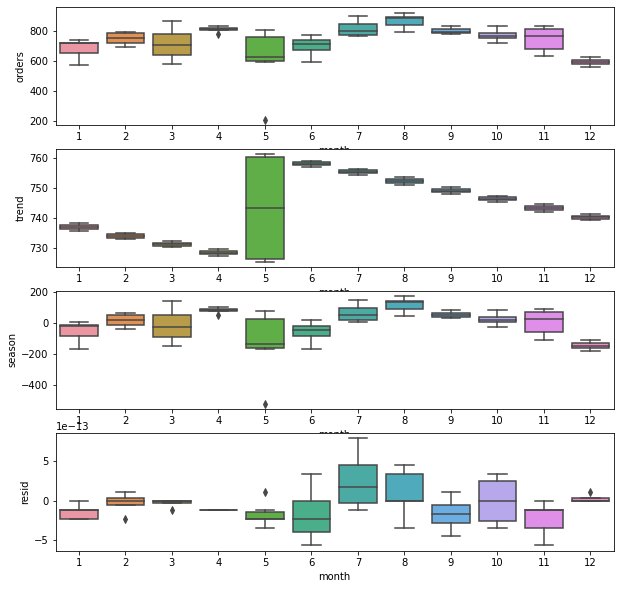

In [30]:
fig, ax = plt.subplots(4,1, figsize=(10,10))
sns.boxplot(x=df_decomp_stl_W.month, y=df_decomp_stl_W.orders, ax=ax[0])
sns.boxplot(x=df_decomp_stl_W.month, y=df_decomp_stl_W.trend, ax=ax[1])
sns.boxplot(x=df_decomp_stl_W.month, y=df_decomp_stl_W.season, ax=ax[2])
sns.boxplot(x=df_decomp_stl_W.month, y=df_decomp_stl_W.resid, ax=ax[3])
plt.show()

In [32]:
# decompose analysis (on day)
df_decomp_stl_D = pd.concat([decompose_stl_D.observed, decompose_stl_D.trend, decompose_stl_D.seasonal, 
                             decompose_stl_D.resid], axis=1)
df_decomp_stl_D["week_day"]= pd.Series(df_decomp_stl_D.index).dt.day_name().values
df_decomp_stl_D["month"]= pd.Series(df_decomp_stl_D.index).dt.month.values
df_decomp_stl_D.head()


,orders,trend,season,resid,week_day,month
datetime,,,,,,
2020-05-11,79.0,85.221568,-9.059626,2.838058,Monday,5
2020-05-12,60.0,85.079235,-24.684239,-0.394996,Tuesday,5
2020-05-13,77.0,84.981599,-8.969261,0.987661,Wednesday,5
2020-05-14,85.0,84.923756,-0.732087,0.808331,Thursday,5
2020-05-15,81.0,84.894437,0.972532,-4.866969,Friday,5


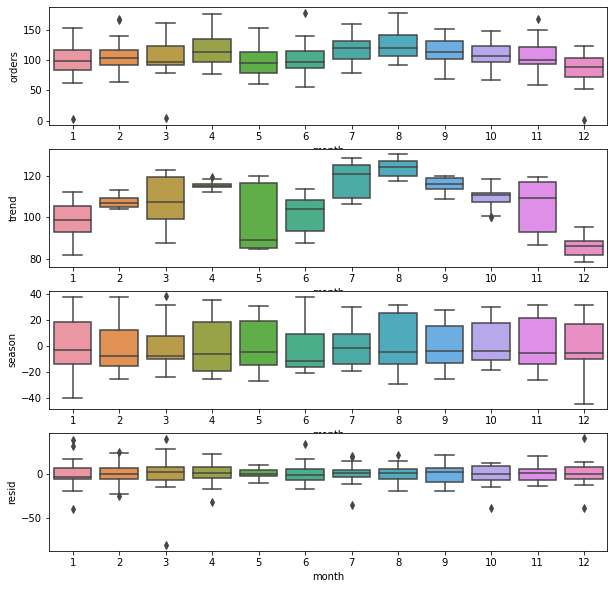

In [33]:
fig, ax = plt.subplots(4,1, figsize=(10,10))
sns.boxplot(x=df_decomp_stl_D.month, y=df_decomp_stl_D.orders, ax=ax[0])
sns.boxplot(x=df_decomp_stl_D.month, y=df_decomp_stl_D.trend, ax=ax[1])
sns.boxplot(x=df_decomp_stl_D.month, y=df_decomp_stl_D.season, ax=ax[2])
sns.boxplot(x=df_decomp_stl_D.month, y=df_decomp_stl_D.resid, ax=ax[3])
plt.show()

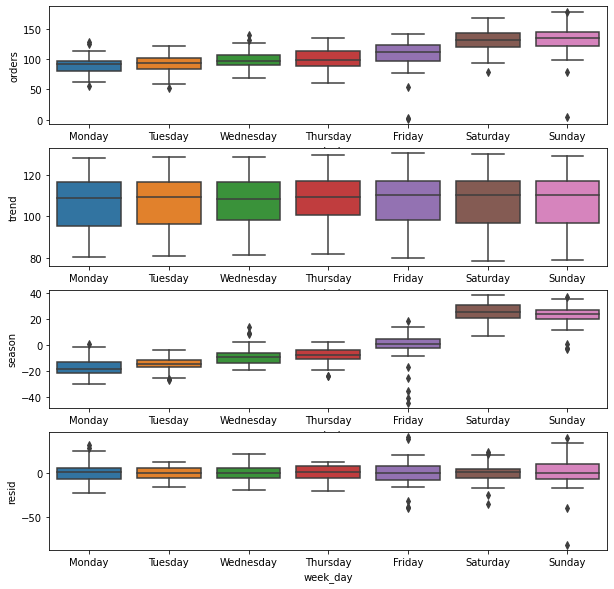

In [34]:
fig, ax = plt.subplots(4,1, figsize=(10,10))
sns.boxplot(x=df_decomp_stl_D.week_day, y=df_decomp_stl_D.orders, ax=ax[0])
sns.boxplot(x=df_decomp_stl_D.week_day, y=df_decomp_stl_D.trend, ax=ax[1])
sns.boxplot(x=df_decomp_stl_D.week_day, y=df_decomp_stl_D.season, ax=ax[2])
sns.boxplot(x=df_decomp_stl_D.week_day, y=df_decomp_stl_D.resid, ax=ax[3])
plt.show()

count    366.000000
mean      -0.009768
std       11.583643
min      -80.474513
25%       -6.365892
50%        0.267569
75%        6.402215
max       40.076655
Name: resid, dtype: float64

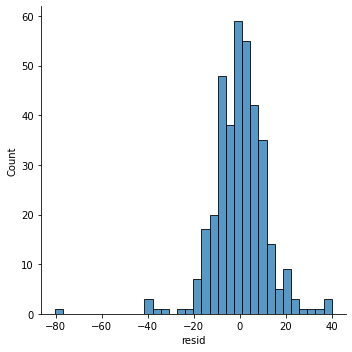

In [35]:
# residual analysis
sns.displot(df_decomp_stl_D.resid)
df_decomp_stl_D.resid.describe()


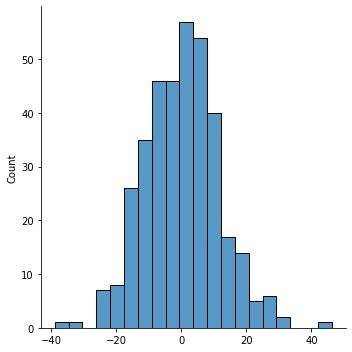

In [36]:
np.random.seed(RANDOM_SEED)
df_random = np.random.normal(loc=0.0, scale=12, size=366)
sns.displot(df_random)

In [37]:
# df_decomp_stl_W
# df_decomp_stl_D
# parameterization 
np.random.seed(RANDOM_SEED)

df_decomp_stl_D["trend_avg_by_month"] = df_decomp_stl_D.groupby("month").trend.transform(lambda x: x.mean())
df_decomp_stl_D["seaon_avg_by_weekday"] = df_decomp_stl_D.groupby("week_day").season.transform(lambda x: x.mean())
df_decomp_stl_D["resid_random"] = np.random.normal(loc=0.0, scale=12, size=len(df_decomp_stl_D))
df_decomp_stl_D

,orders,trend,season,resid,week_day,month,trend_avg_by_month,seaon_avg_by_weekday,resid_random
datetime,,,,,,,,,
2020-05-11,79.0,85.221568,-9.059626,2.838058,Monday,5,97.36645,-16.918337,5.960570
2020-05-12,60.0,85.079235,-24.684239,-0.394996,Tuesday,5,97.36645,-14.824533,-1.659172
2020-05-13,77.0,84.981599,-8.969261,0.987661,Wednesday,5,97.36645,-8.391920,7.772262
2020-05-14,85.0,84.923756,-0.732087,0.808331,Thursday,5,97.36645,-7.725589,18.276358
2020-05-15,81.0,84.894437,0.972532,-4.866969,Friday,5,97.36645,-0.583848,-2.809840
...,...,...,...,...,...,...,...,...,...
2021-05-07,127.0,117.374144,18.477891,-8.852035,Friday,5,97.36645,-0.583848,18.392867
2021-05-08,153.0,117.856122,28.511815,6.632063,Saturday,5,97.36645,25.606944,-1.305122
2021-05-09,129.0,118.411654,13.611438,-3.023093,Sunday,5,97.36645,22.878210,4.820541


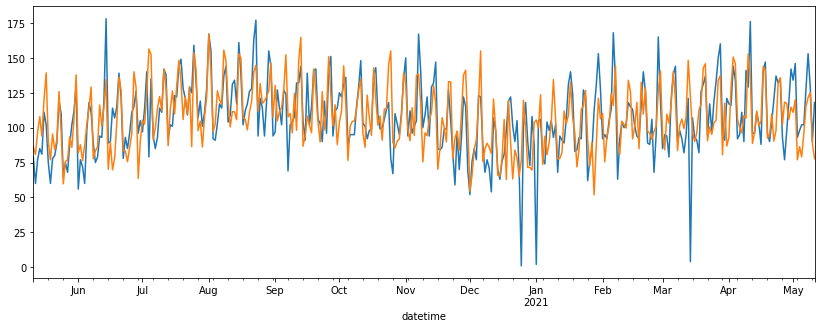

In [38]:
# recompose and compare
fig, ax = plt.subplots(figsize=(14,5))
ax = df_decomp_stl_D.orders.plot()
ax = (df_decomp_stl_D.trend_avg_by_month+
      df_decomp_stl_D.seaon_avg_by_weekday+
      df_decomp_stl_D["resid_random"]).plot()

plt.show()

In [ ]:
# perform on hourly

In [39]:
# decompose_stl_H
df_decomp_stl_H = pd.concat([decompose_stl_H.observed, decompose_stl_H.trend, decompose_stl_H.seasonal, 
                             decompose_stl_H.resid], axis=1)
# df_decomp_stl_H.head()
df_decomp_stl_H["hour"]= pd.Series(df_decomp_stl_H.index).dt.hour.values
df_decomp_stl_H["week_day"]= pd.Series(df_decomp_stl_H.index).dt.day_name().values
df_decomp_stl_H["month"]= pd.Series(df_decomp_stl_H.index).dt.month.values
df_decomp_stl_H.head()

,orders,trend,season,resid,hour,week_day,month
datetime,,,,,,,
2020-05-11 07:00:00,2.0,10.764614,-9.563098,0.798484,7,Monday,5
2020-05-11 08:00:00,7.0,10.668367,-3.896892,0.228524,8,Monday,5
2020-05-11 09:00:00,13.0,10.573292,2.092393,0.334315,9,Monday,5
2020-05-11 10:00:00,17.0,10.479437,5.163476,1.357087,10,Monday,5
2020-05-11 11:00:00,11.0,10.386833,1.927412,-1.314246,11,Monday,5


In [41]:
df_decomp_stl_H.resid.describe()

count    8770.000000
mean       -0.000863
std         1.988647
min        -9.961299
25%        -0.575355
50%         0.019865
75%         0.488298
max        16.593937
Name: resid, dtype: float64

In [71]:
# perform on hourly data
# df_decomp_stl_W
# df_decomp_stl_D
# parameterization 
np.random.seed(RANDOM_SEED)
df_decomp_stl_H["trend_avg_by_month"] = df_decomp_stl_H.groupby("month").trend.transform(lambda x: x.mean())
df_decomp_stl_H["seaon_avg_by_weekday_hour"] = df_decomp_stl_H.groupby(["month","week_day", "hour"]).season.transform(lambda x: x.mean())
df_decomp_stl_H["resid_random"] = np.random.normal(loc=0.0, scale=2*2, size=len(df_decomp_stl_H))
df_decomp_stl_H["recompose"] = df_decomp_stl_H.trend_avg_by_month+\
                                df_decomp_stl_H.seaon_avg_by_weekday_hour+\
                                df_decomp_stl_H["resid_random"]

df_decomp_stl_H.head()

,orders,trend,season,resid,hour,week_day,month,trend_avg_by_month,seaon_avg_by_weekday_hour,resid_random,recompose
datetime,,,,,,,,,,,
2020-05-11 07:00:00,2.0,10.764614,-9.563098,0.798484,7,Monday,5,10.646428,-4.737768,1.986857,7.895516
2020-05-11 08:00:00,7.0,10.668367,-3.896892,0.228524,8,Monday,5,10.646428,1.489231,-0.553057,11.582601
2020-05-11 09:00:00,13.0,10.573292,2.092393,0.334315,9,Monday,5,10.646428,3.061265,2.590754,16.298447
2020-05-11 10:00:00,17.0,10.479437,5.163476,1.357087,10,Monday,5,10.646428,5.545069,6.092119,22.283616
2020-05-11 11:00:00,11.0,10.386833,1.927412,-1.314246,11,Monday,5,10.646428,0.995746,-0.936613,10.705560


In [75]:
# polish: make recompose into integer, out of business our set orders to zero
df_decomp_stl_H
df_decomp_stl_H.orders[df_decomp_stl_H.hour>=17] = 0
df_decomp_stl_H.orders[df_decomp_stl_H.hour<=6] = 0
df_decomp_stl_H.recompose[df_decomp_stl_H.hour>=17] = 0
df_decomp_stl_H.recompose[df_decomp_stl_H.hour<=6] = 0

# round 
df_decomp_stl_H.recompose = df_decomp_stl_H.recompose.apply(lambda x: round(x))

# clean the negative
df_decomp_stl_H.recompose[df_decomp_stl_H.recompose<0] = 0

<ipython-input-75-d0a1600c0e6d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_decomp_stl_H.orders[df_decomp_stl_H.hour>=17] = 0
<ipython-input-75-d0a1600c0e6d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_decomp_stl_H.orders[df_decomp_stl_H.hour<=6] = 0
<ipython-input-75-d0a1600c0e6d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_decomp_stl_H.recompose[df_decomp_stl_H.hour>=17] = 0
<ipython-input-75-d0a1600c0e6d>:6: 

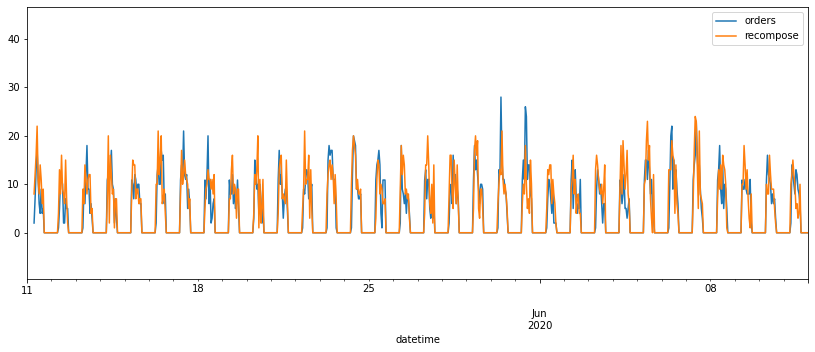

In [69]:
# recompose and compare
fig, ax = plt.subplots(figsize=(14,5))
ax = df_decomp_stl_H.orders.plot()
ax = df_decomp_stl_H.recompose.plot()
plt.xlim(["2020-05-11","2020-06-12"])
plt.legend(["orders", "recompose"])
plt.show()

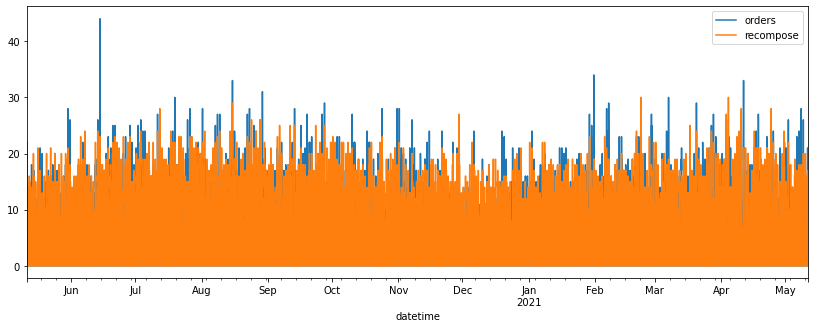

In [76]:
# recompose and compare
fig, ax = plt.subplots(figsize=(14,5))
ax = df_decomp_stl_H.orders.plot()
ax = df_decomp_stl_H.recompose.plot()
# plt.xlim(["2020-05-11","2020-05-16"])
plt.legend(["orders", "recompose"])
plt.show()